In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

print(df.head())          # First few rows
print(df.info())          # Get info about the DataFrame
print(df.describe())      # Get summary statistics

Saving Impact_of_Remote_Work_on_Mental_Health.csv to Impact_of_Remote_Work_on_Mental_Health.csv
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna()

# Slicing the DataFrame
subset_df = df.iloc[0:10]  # Get the first 10 rows

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


Count Summary of Stress Levels by Work Location:
Stress_Level     1    2    3
Work_Location               
Hybrid         543  545  561
Onsite         555  547  535
Remote         547  577  590

Median Stress Level (Remote): 2.0
Median Stress Level (Onsite): 2.0


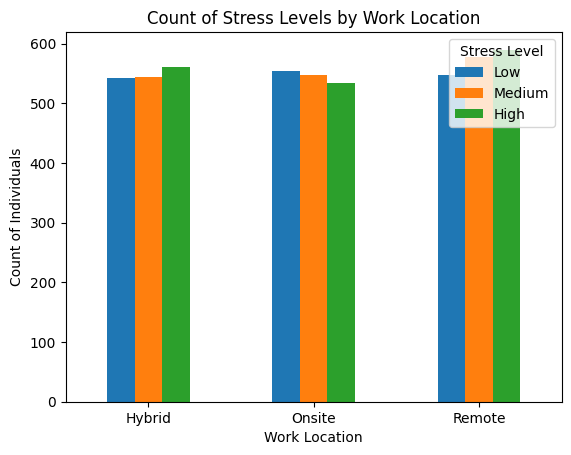

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Define a mapping for stress levels
stress_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Apply the mapping to the Stress_Level column
data['Stress_Level'] = data['Stress_Level'].map(stress_mapping)

# Drop NaN values from Stress_Level after mapping
data.dropna(subset=['Stress_Level'], inplace=True)

# Create count summary for stress levels by work location
count_summary = data.groupby(['Work_Location', 'Stress_Level']).size().unstack(fill_value=0)

# Display the count summary
print("Count Summary of Stress Levels by Work Location:")
print(count_summary)

# Calculate median stress levels
remote_median = data[data['Work_Location'] == 'Remote']['Stress_Level'].median()
onsite_median = data[data['Work_Location'] == 'Onsite']['Stress_Level'].median()

print(f"\nMedian Stress Level (Remote): {remote_median}")
print(f"Median Stress Level (Onsite): {onsite_median}")

# Plotting the counts
count_summary.plot(kind='bar', stacked=False)
plt.title('Count of Stress Levels by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Count of Individuals')
plt.legend(['Low', 'Medium', 'High'],title='Stress Level')
plt.xticks(rotation=0)
plt.show()


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Define and apply the mapping
mental_health_mapping = {
    'none': 0,
    'depression': 1,
    'anxiety': 2,
    'burnout': 3
}
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].map(mental_health_mapping)

# Check the data after loading
print("First few rows of the data:")
print(data.head())

# Verify mapping and check for NaN values
print("\nUnique values in 'Mental_Health_Condition' after mapping:")
print(data['Mental_Health_Condition'].unique())

print("\nMissing values in each column:")
print(data[['Hours_Worked_Per_Week', 'Mental_Health_Condition']].isna().sum())

# Drop rows with NaN in Mental_Health_Condition
data.dropna(subset=['Mental_Health_Condition'], inplace=True)

# Ensure 'Hours_Worked_Per_Week' is numeric
data['Hours_Worked_Per_Week'] = pd.to_numeric(data['Hours_Worked_Per_Week'], errors='coerce')

# Drop rows with NaN in Hours_Worked_Per_Week after conversion
data.dropna(subset=['Hours_Worked_Per_Week'], inplace=True)

# Perform the grouping
count_summary = data.groupby(['Hours_Worked_Per_Week', 'Mental_Health_Condition']).size().unstack(fill_value=0)

# Display the count summary
print("\nCount Summary of Mental Health Conditions by Hours Worked Per Week:")
print(count_summary)

# Calculate counts with fallback for missing categories
none_count = count_summary.get(0, pd.Series()).sum()
depression_count = count_summary.get(1, pd.Series()).sum()
anxiety_count = count_summary.get(2, pd.Series()).sum()
burnout_count = count_summary.get(3, pd.Series()).sum()

print(f"\nCount of Mental Health Conditions (All Hours Worked):")
print(f"None: {none_count}, Depression: {depression_count}, Anxiety: {anxiety_count}, Burnout: {burnout_count}")

# Plot the data if count_summary is not empty
    count_summary.plot(kind='bar', stacked=True)
    plt.title('Count of Mental Health Conditions by Hours Worked Per Week')
    plt.xlabel('Hours Worked Per Week')
    plt.ylabel('Count of Individuals')
    plt.legend(['None', 'Depression', 'Anxiety', 'Burnout'], title='Mental Health Condition')
    plt.xticks(rotation=0)
    plt.show()


IndentationError: unexpected indent (<ipython-input-1-b08c0187def9>, line 54)

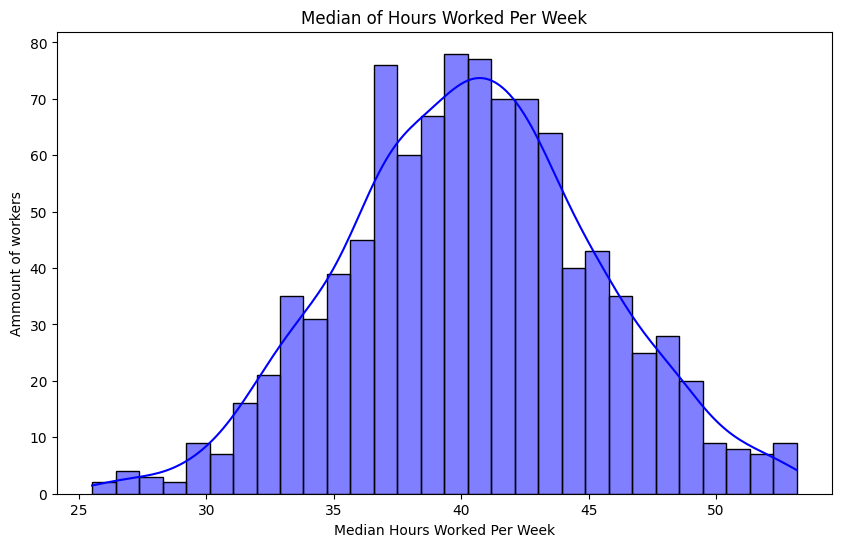

In [ ]:
import numpy as np
import pandas as pd

# Sample data generation for demonstration
np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    'Work_Location': np.random.choice(['Remote', 'Onsite', 'Hybrid'], 1000),
    'Hours_Worked_Per_Week': np.random.normal(loc=40, scale=5, size=1000),
    'Employee_Satisfaction': np.random.uniform(1, 10, size=1000)  # Satisfaction scores from 1 to 10
})
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Hours_Worked_Per_Week'], bins=30, kde=True, color='blue')
plt.title('Median of Hours Worked Per Week')
plt.xlabel('Median Hours Worked Per Week')
plt.ylabel('Ammount of workers')
plt.show()


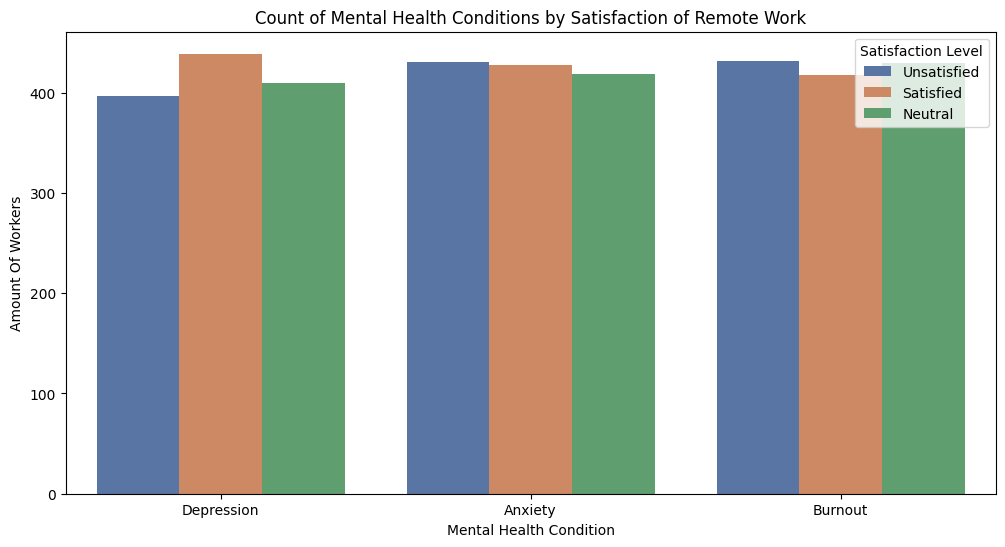

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in Mental Health Condition and Satisfaction of Remote Work
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Mental_Health_Condition', hue='Satisfaction_with_Remote_Work', palette='deep')
plt.title('Count of Mental Health Conditions by Satisfaction of Remote Work')
plt.xlabel('Mental Health Condition')
plt.ylabel('Amount Of Workers')
plt.legend(title='Satisfaction Level')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')  # Replace with your actual file path

# Display the first few rows and the columns
print(data.head())
print(data.columns)

# Drop rows with NaN in the relevant columns
data_cleaned = data.dropna(subset=['Mental_Health_Condition', 'Satisfaction_with_Remote_Work'])

# Create mapping for encoding
mental_health_mapping = {
    'None': 0,
    'Stress': 1,
    'Burnout': 2,
    'Depression': 3
}

satisfaction_mapping = {
    'Unsatisfied': 1,
    'Neutral': 2,
    'Satisfied': 3
}

# Apply the mapping to the DataFrame
data_cleaned['Mental_Health_Condition'] = data_cleaned['Mental_Health_Condition'].map(mental_health_mapping)
data_cleaned['Satisfaction_with_Remote_Work'] = data_cleaned['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)

# Create a pivot table for the heatmap
heatmap_data = data_cleaned.pivot_table(
    index='Mental_Health_Condition',
    columns='Satisfaction_with_Remote_Work',
    values='Satisfaction_with_Remote_Work',
    aggfunc='count',
    fill_value=0
)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True, fmt='d')
plt.title('Heatmap of Mental Health Conditions vs. Satisfaction Levels of Remote Work')
plt.xlabel('Satisfaction Level')
plt.ylabel('Mental Health Condition')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

<ipython-input-31-c90152862462>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Mental_Health_Condition'] = data_cleaned['Mental_Health_Condition'].map(mental_health_mapping)
<ipython-input-31-c90152862462>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Satisfaction_with_Remote_Work'] = data_cleaned['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)


ValueError: Grouper for 'Satisfaction_with_Remote_Work' not 1-dimensional